In [1]:
'''https://github.com/Caesar73/gitchatcamp/blob/master/p3/movies.ipynb'''

'https://github.com/Caesar73/gitchatcamp/blob/master/p3/movies.ipynb'

In [2]:
import time

import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, LabelBinarizer, MultiLabelBinarizer
# 网格搜索和随机搜索
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.cross_validation import train_test_split
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 文本特性抽取器 CountVectorizer 和 TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# 朴素贝叶斯模型
from sklearn.naive_bayes import MultinomialNB
# Pipeline 用于方便搭建系统流程
from sklearn.pipeline import Pipeline 
# GridSearchCV 用于超参数组合的网格搜索
# from sklearn.grid_search import GridSearchCV 

/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWa

In [3]:
# 导入 Stock 数据
data = pd.read_csv("../input/movies_dataset.csv")
data = data.dropna()

''' 
clean_z = data['region'].fillna(0)
clean_z[clean_z == ''] = float('nan')
data['region'] = clean_z

data = data.dropna()

data = data[data['rate'] > 0]
data = data[data['votes'] > 0]
data = data[data['runtime'] > 0]

data['rate']=data['rate'].applymap(lambda x: float(x) if x.isdigit() else -1)
data = data[data['rate']>0]
'''

'''

for i in range(len(data)):
    rate = float(data['rate'][i])
    votes = float(data['votes'][i])
    region = data['region'][i]
    runtime = float(data['runtime'][i])
    #print(region)
    if pd.isna(region):
        print(region)
        data = data.drop(i)
    elif region.isdigit():
        print(region)
        data = data.drop(i)
'''

# ^_^ 借用一下楼下 JAVA哥哥滴代码
# T_T 自己的方法回头改改
used_features = ["director", "starring","type","rate","votes","region","runtime","language","company"]
data=data[used_features].applymap(lambda x: x.replace("\'",'').replace(r"\n","")
                                  .strip()).applymap(lambda x: np.NaN if str(x).isspace() or x=='null' else x)
data.dropna(axis=0, how='any', inplace=True)
number_features = ['rate','votes','runtime']
data[number_features]=data[number_features].applymap(lambda x: float(x) if x.isdigit() else -1)
data = data[data['votes']>0]
data = data[data['rate']>0]
data = data[data['runtime']>0]

data[['rate','votes','runtime']] = data[['rate','votes','runtime']].apply(pd.to_numeric)

In [4]:
data.head()

,director,starring,type,rate,votes,region,runtime,language,company
23,迈克·李,大卫·休里斯 莱丝莉·夏普 凯特琳·卡特利吉,剧情 喜剧,8.0,174.0,英国,131.0,英语,标准收藏
71,柳承莞,李慧英 全度妍 郑在泳,动作 剧情,7.0,15.0,韩国,116.0,韩语,Cinema Service
93,刘伟强,刘德华 郑伊健 张家辉,动作 奇幻 科幻 冒险 喜剧,6.0,2983.0,中国香港,106.0,粤语,MC-One (Media Cooperation One) GmbH
112,吉姆·谢里丹,萨曼莎·莫顿 杰曼·翰苏 莎拉·伯格,爱情 剧情,8.0,101.0,爱尔兰 英国,105.0,英语,20世纪福克斯公司
139,加布里尔·穆奇诺,斯蒂芬努·阿科西 斯蒂芬尼娅·桑德雷莉 玛蒂娜·斯黛拉,剧情 喜剧,8.0,93.0,意大利,115.0,意大利语,Medusa Distribuzione


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1854 entries, 23 to 179372
Data columns (total 9 columns):
director    1854 non-null object
starring    1854 non-null object
type        1854 non-null object
rate        1854 non-null float64
votes       1854 non-null float64
region      1854 non-null object
runtime     1854 non-null float64
language    1854 non-null object
company     1854 non-null object
dtypes: float64(3), object(6)
memory usage: 144.8+ KB


In [6]:
# 数据预处理，将非数值型数据转换为数值型
columnsToEncode = list(data.select_dtypes(include=['object']))
print(columnsToEncode)
for feature in columnsToEncode:
    try:
        data[feature] = LabelEncoder().fit_transform(data[feature])
    except:
        print('Error encoding ' + feature)

X = data
y = data['rate']
X = data.drop(['rate'], axis=1)

['director', 'starring', 'type', 'region', 'language', 'company']


In [7]:
data.head()

,director,starring,type,rate,votes,region,runtime,language,company
23,1342,561,30,8.0,174.0,196,131.0,91,621
71,922,893,95,7.0,15.0,234,116.0,192,119
93,385,428,136,6.0,2983.0,14,106.0,80,309
112,445,1439,435,8.0,101.0,148,105.0,91,4
139,404,818,30,8.0,93.0,68,115.0,28,330


In [8]:
# 数据建模
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = np.array(y).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

In [11]:
# 设置随机森林参数网络
start = time.time()
rf_param_grid = {
    "max_depth": [10],
    "max_features": [3],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators" :[100,300],
    "criterion": ["gini"]
}

gsRFC = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_param_grid, cv=4, scoring="accuracy", n_jobs= 1, verbose = 1)
gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_estimator_

end = time.time() - start
end

Fitting 4 folds for each of 18 candidates, totalling 72 fits


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   46.3s finished


47.322046995162964

In [12]:
print(RFC_best)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [13]:
print(gsRFC.best_score_)

0.5446043165467626


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=4.
  % (min_groups, self.n_splits)), Warning)


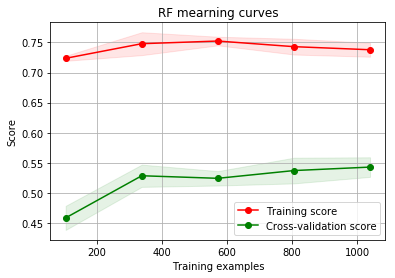

In [16]:
# 学习曲线
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt
g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,y_train,cv=4)
plt.show()